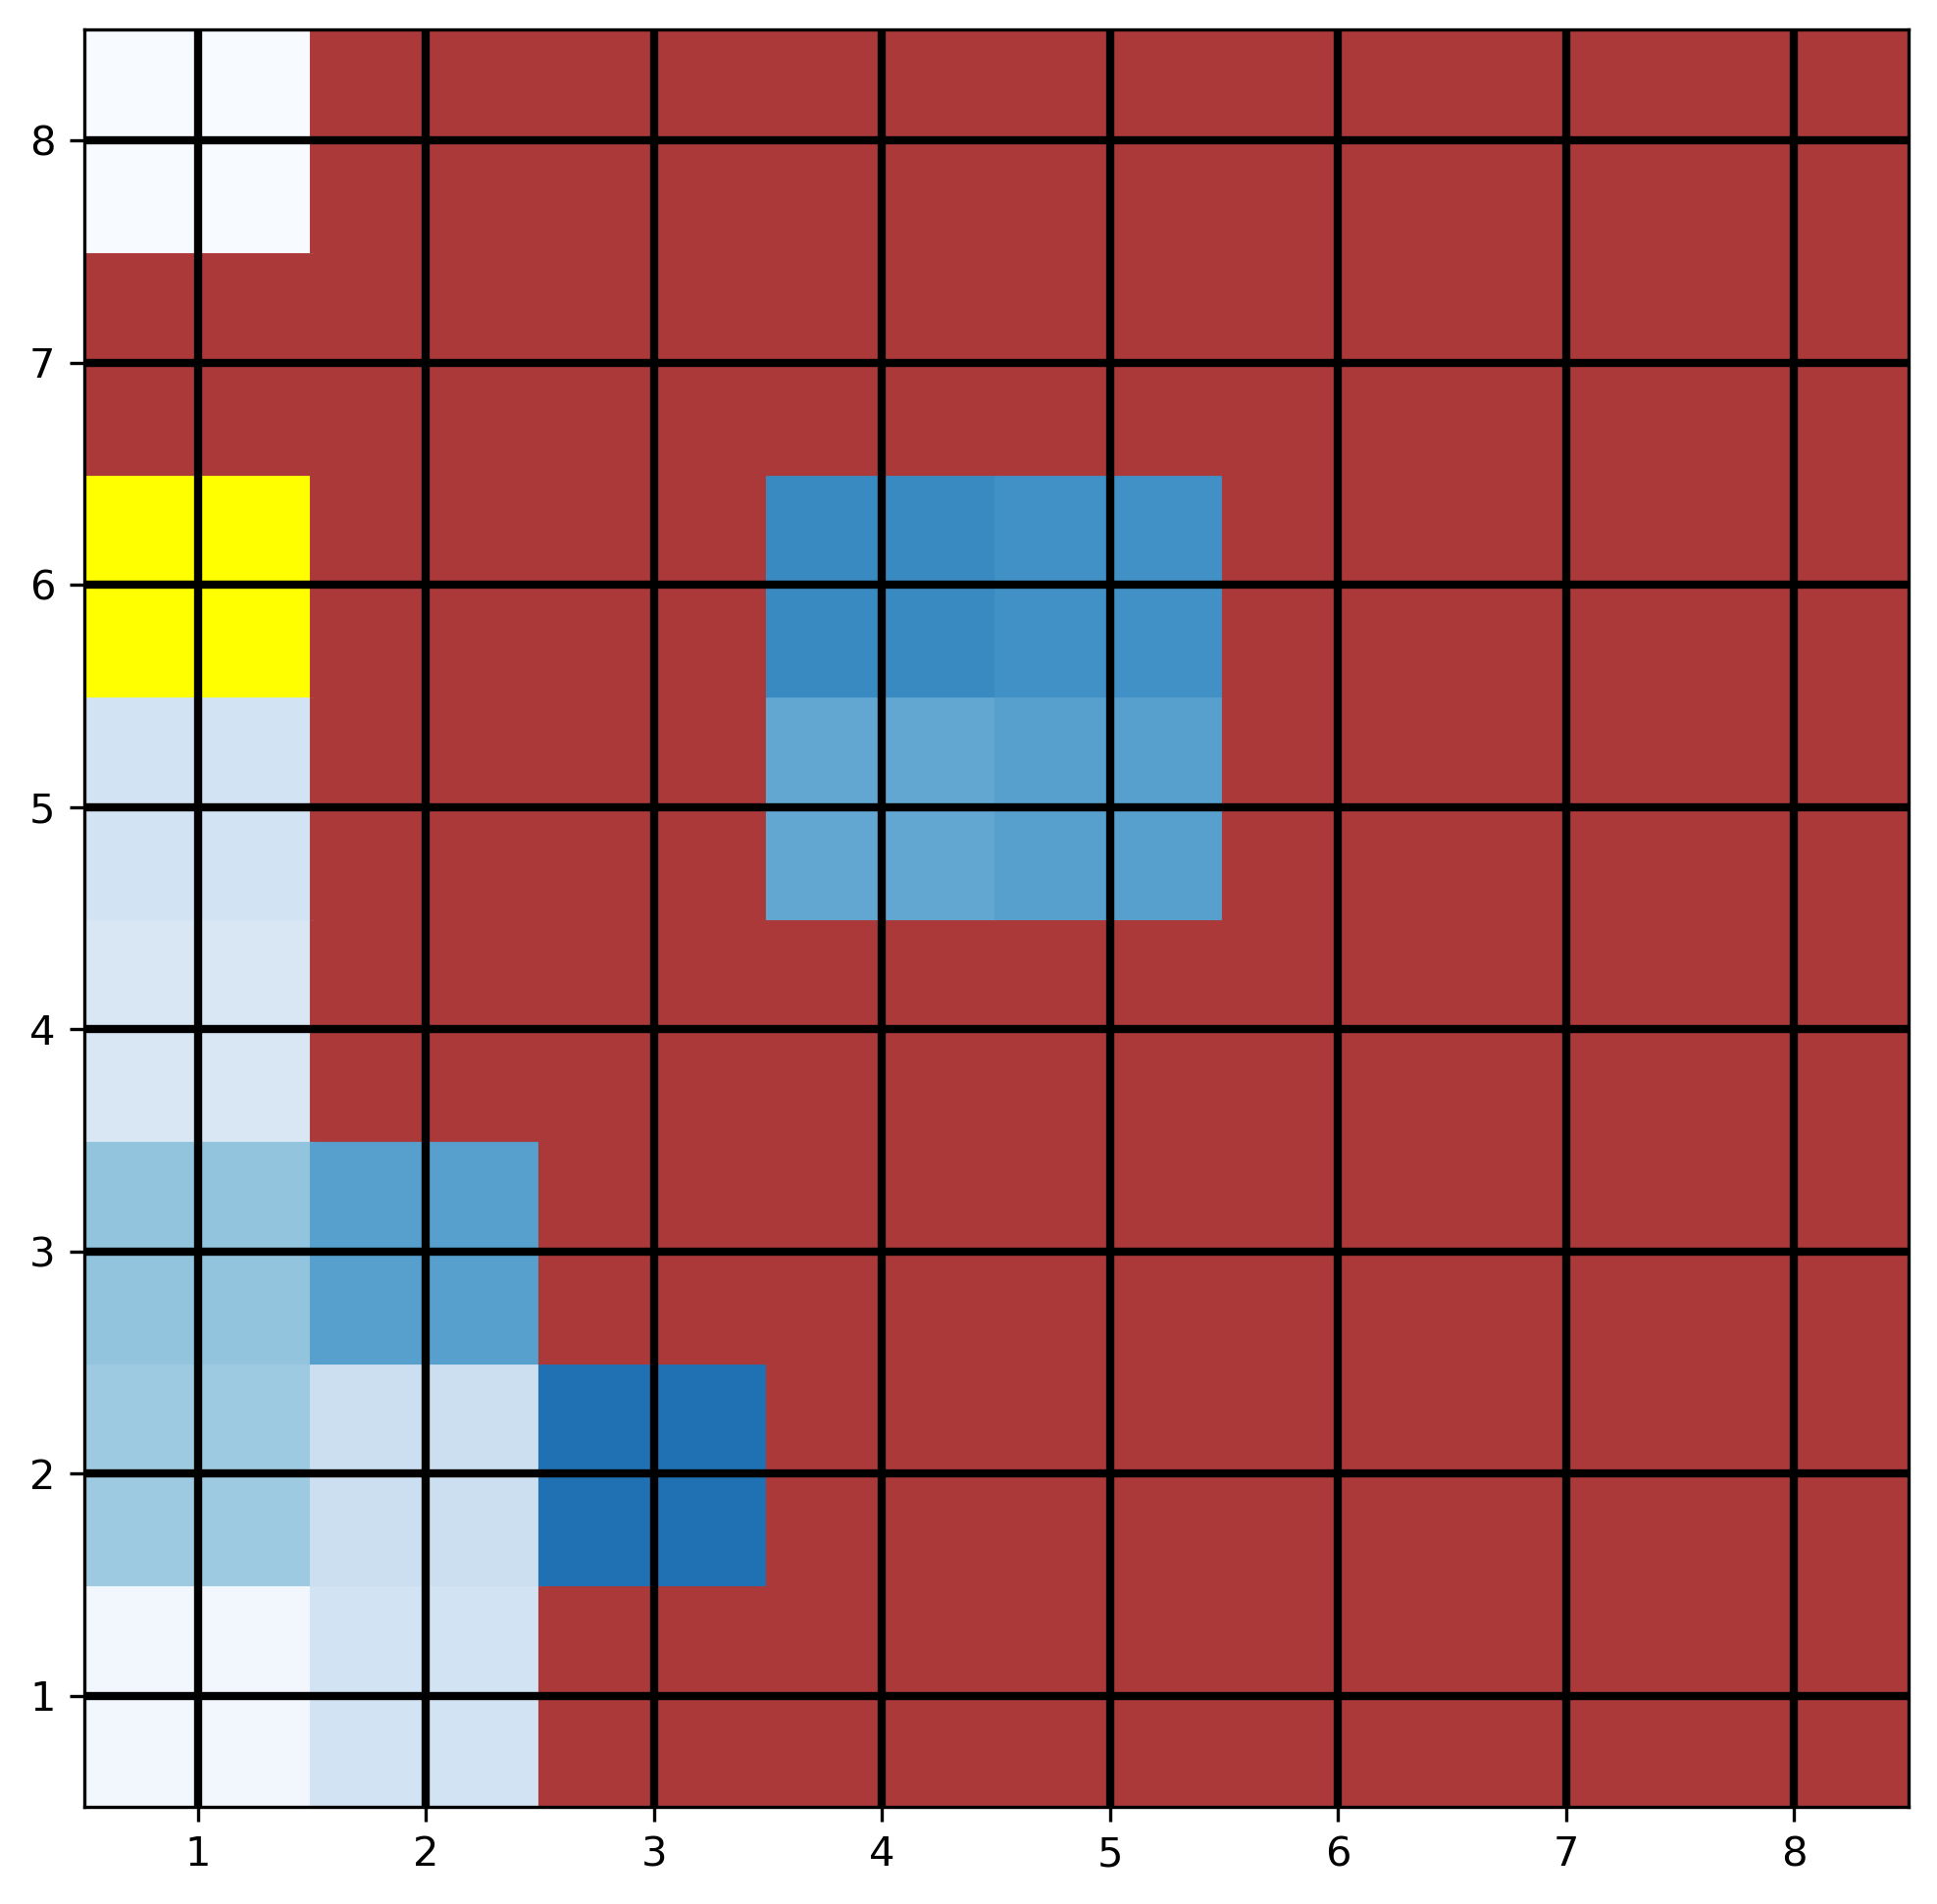

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/roko/cursos/mkp/pet1_11-14.csv')
#df = pd.read_csv('/home/roko/cursos/mkp/resultados/gk06/gk06resu.csv', nrows=100000)

# Obtener el tamaño máximo de las coordenadas x e y
n = df['x'].max()
m = df['y'].max()

# Crear una matriz vacía para los valores de rel
matrix = np.zeros((m, n))

# Crear una matriz para los colores
color_matrix = np.empty((m, n), dtype='object')

# Llenar la matriz con los valores de 'rel' y la matriz de colores
for _, row in df.iterrows():
    z, x, y, f, rel = row
    x_idx, y_idx = int(x)-1, int(y)-1  # Ajustar índices a base 0
    matrix[y_idx][x_idx] = z

    if f == 0:
        color_matrix[y_idx][x_idx] = '#AC3939'

    elif f == 1 and rel == 1:
        color_matrix[y_idx][x_idx] = 'yellow'
    else:
        color_matrix[y_idx][x_idx] = plt.cm.Blues(rel)



# Crear la figura y los ejes con tamaño cuadrado
fig, ax = plt.subplots(figsize=(m, m), dpi=300)

# Dibujar la cuadrícula con los números de 'rel' en cada celda y los colores especificados
for i in range(m):
    for j in range(n):
        color_value = color_matrix[i, j]
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_value))
        #text = '{:.0f}'.format(matrix[i, j])  # Formatear el valor de rel
        #ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

# Añadir la cuadrícula
ax.set_xticks(np.arange(n) + 0.5)
ax.set_yticks(np.arange(m) + 0.5)
ax.set_xticklabels(range(1, n + 1))
ax.set_yticklabels(range(1, m + 1))
ax.grid(which='both', color='black', linestyle='-', linewidth=2)


# Ajustar la escala de los ejes para que la figura sea cuadrada
ax.set_xlim(0, n)
ax.set_ylim(0, m)

# Guardar la imagen en alta definición
plt.savefig('pet1_66-10,6.png', dpi=100, bbox_inches='tight')

# Mostrar la imagen
#plt.show()